In [42]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

df2 = pd.read_excel('BASE_2_Clientes_Manga.xlsx')


In [43]:
# !pip install statsmodels


# Criação da variável de missing 

In [44]:
df2['missing_importancia_preco'] = df2['importancia_preco'].isna().astype(int)


In [45]:
df2.groupby('tipo_cliente')['missing_importancia_preco'].mean()


tipo_cliente
B2B    0.094933
B2C    0.049738
Name: missing_importancia_preco, dtype: float64

In [46]:
df2.groupby('missing_importancia_preco')[
    [
        'volume_tipico_compra_ton_mes',
        'frequencia_compra_mensal',
        'importancia_manga_produto_final_1a10'
    ]
].mean()


,volume_tipico_compra_ton_mes,frequencia_compra_mensal,importancia_manga_produto_final_1a10
missing_importancia_preco,,,
0,906.259027,3.373783,7.560126
1,1603.571429,3.101587,7.388889


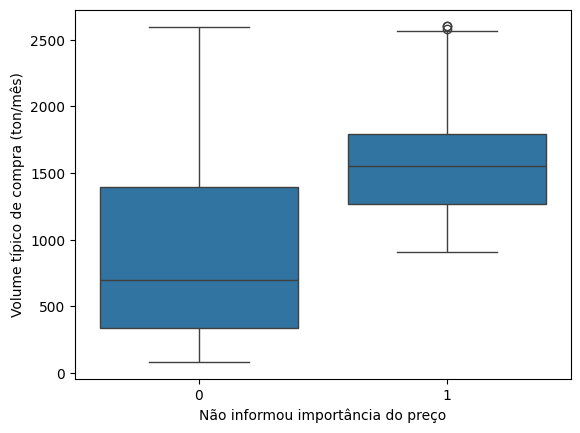

In [47]:
sns.boxplot(
    data=df2,
    x='missing_importancia_preco',
    y='volume_tipico_compra_ton_mes'
)
plt.xlabel('Não informou importância do preço')
plt.ylabel('Volume típico de compra (ton/mês)')
plt.show()


In [48]:
X = df2[
    [
        'volume_tipico_compra_ton_mes',
        'frequencia_compra_mensal',
        'importancia_manga_produto_final_1a10'
    ]
]

X = sm.add_constant(X)
y = df2['missing_importancia_preco']

model = sm.Logit(y, X).fit()
print(model.summary())


Optimization terminated successfully.
         Current function value: 0.256582
         Iterations 8
                               Logit Regression Results                              
Dep. Variable:     missing_importancia_preco   No. Observations:                 7000
Model:                                 Logit   Df Residuals:                     6996
Method:                                  MLE   Df Model:                            3
Date:                       Thu, 29 Jan 2026   Pseudo R-squ.:                  0.1519
Time:                               03:55:52   Log-Likelihood:                -1796.1
converged:                              True   LL-Null:                       -2117.8
Covariance Type:                   nonrobust   LLR p-value:                3.952e-139
                                           coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------


In [49]:
cols_num = [
    'volume_tipico_compra_ton_mes',
    'frequencia_compra_mensal',
    'importancia_manga_produto_final_1a10'
]

df2[cols_num + ['missing_importancia_preco']].corr()


,volume_tipico_compra_ton_mes,frequencia_compra_mensal,importancia_manga_produto_final_1a10,missing_importancia_preco
volume_tipico_compra_ton_mes,1.000000,-0.292432,-0.104149,0.305435
frequencia_compra_mensal,-0.292432,1.000000,0.118891,-0.091486
importancia_manga_produto_final_1a10,-0.104149,0.118891,1.000000,-0.030457
missing_importancia_preco,0.305435,-0.091486,-0.030457,1.000000


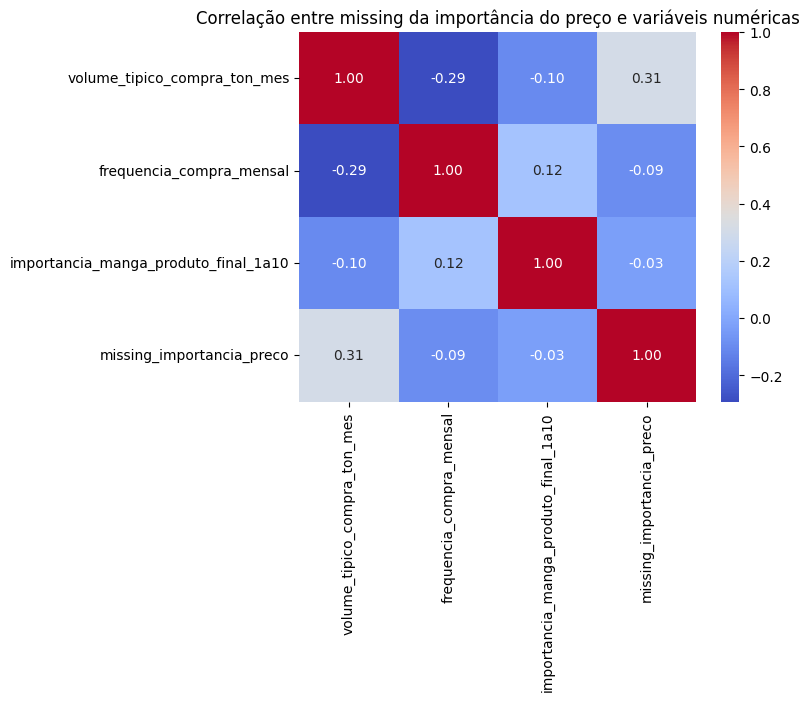

In [50]:
import seaborn as sns
import matplotlib.pyplot as plt

corr = df2[cols_num + ['missing_importancia_preco']].corr()

sns.heatmap(
    corr,
    annot=True,
    cmap='coolwarm',
    fmt='.2f'
)
plt.title('Correlação entre missing da importância do preço e variáveis numéricas')
plt.show()


# Associacao com variaveis categoricas

In [51]:
df2.groupby('tipo_cliente')['missing_importancia_preco'].mean()


tipo_cliente
B2B    0.094933
B2C    0.049738
Name: missing_importancia_preco, dtype: float64

In [52]:
from scipy.stats import chi2_contingency

tabela = pd.crosstab(df2['tipo_cliente'], df2['missing_importancia_preco'])
chi2, p, dof, expected = chi2_contingency(tabela)

chi2, p


(np.float64(16.426783016824295), np.float64(5.0565695522794524e-05))

In [53]:
df2[df2['missing_importancia_preco'] == 1][cols_num].describe()


,volume_tipico_compra_ton_mes,frequencia_compra_mensal,importancia_manga_produto_final_1a10
count,630.000000,630.000000,630.000000
mean,1603.571429,3.101587,7.388889
std,431.855902,0.696914,1.750640
min,908.000000,2.000000,4.000000
25%,1270.750000,3.000000,7.000000
50%,1556.000000,3.000000,7.000000
75%,1794.500000,4.000000,9.000000
max,2600.000000,4.000000,10.000000


In [54]:
df2[df2['missing_importancia_preco'] == 0][cols_num].describe()


,volume_tipico_compra_ton_mes,frequencia_compra_mensal,importancia_manga_produto_final_1a10
count,6370.000000,6370.000000,6370.000000
mean,906.259027,3.373783,7.560126
std,637.950626,0.861506,1.593748
min,80.000000,2.000000,4.000000
25%,337.000000,3.000000,6.000000
50%,700.000000,3.000000,8.000000
75%,1396.000000,4.000000,9.000000
max,2599.000000,5.000000,10.000000


## Criacao de perfil de volume (ja que é numerico)

In [55]:
df2['perfil_volume'] = np.where(
    df2['volume_tipico_compra_ton_mes'] > df2['volume_tipico_compra_ton_mes'].median(),
    'Alto volume',
    'Baixo volume'
)


In [56]:
perfil_cols = ['tipo_cliente', 'aceita_refugo_como_mp', 'perfil_volume']


In [57]:
moda_por_perfil = (
    df2[df2['missing_importancia_preco'] == 0]
    .groupby(perfil_cols)['importancia_preco']
    .agg(lambda x: x.mode().iloc[0])
)

moda_por_perfil

tipo_cliente  aceita_refugo_como_mp  perfil_volume
B2B           Não                    Alto volume       Alta
                                     Baixo volume     Baixa
              Sim                    Alto volume       Alta
                                     Baixo volume     Média
B2C           Não                    Alto volume       Alta
                                     Baixo volume     Média
              Sim                    Alto volume       Alta
                                     Baixo volume     Média
Name: importancia_preco, dtype: object

In [58]:
def imputar_importancia_preco(row):
    if pd.isna(row['importancia_preco']):
        return moda_por_perfil.loc[
            (row['tipo_cliente'], row['aceita_refugo_como_mp'], row['perfil_volume'])
        ]
    return row['importancia_preco']

df2['importancia_preco'] = df2.apply(imputar_importancia_preco, axis=1)


In [59]:
df2['importancia_preco'].isna().sum()


np.int64(0)

In [60]:
df2_tratada = df2.copy()


In [61]:
df2_tratada.to_excel('BASE_2_Clientes_Manga_tratada.xlsx', index=False)
